In [5]:
from ultralytics import YOLO
from PIL import Image
import numpy as np

model = YOLO("yolov8n-seg.pt")

In [6]:
image_path = "selfie1.jpeg"
image = Image.open(image_path)
img_array = np.array(image)
print(img_array.shape)

(3024, 4032, 3)


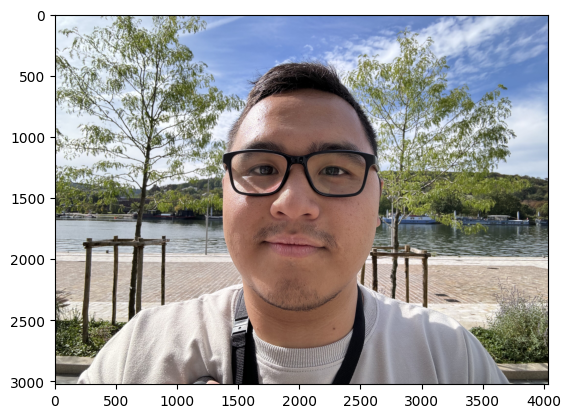

In [52]:
import matplotlib.pyplot as plt

plt.imshow(img_array)

In [7]:
results = model(img_array)


0: 480x640 1 person, 117.5ms
Speed: 3.8ms preprocess, 117.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)



True
<class 'numpy.ndarray'> (3024, 4032, 3) uint8
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


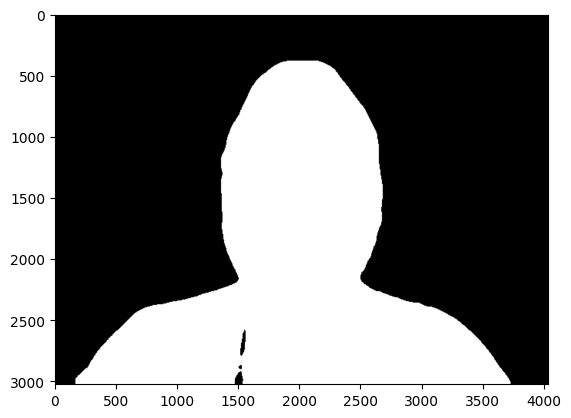

In [48]:

import cv2
print()
print(0 in results[0].boxes.cls.numpy())
mask = np.zeros(img_array.shape)
# print(results[0].boxes)

selfie_mask = results[0].plot(img=mask, labels=False, boxes=False, probs=False).astype(np.uint8)
print(type(selfie_mask), selfie_mask.shape, selfie_mask.dtype)
mask_gray = cv2.cvtColor(selfie_mask, cv2.COLOR_BGR2GRAY)
print(type(selfie_mask),type(mask_gray))
ret, selfie_bin = cv2.threshold(mask_gray, 1, 255, cv2.THRESH_BINARY)
plt.imshow(selfie_bin, cmap="gray")

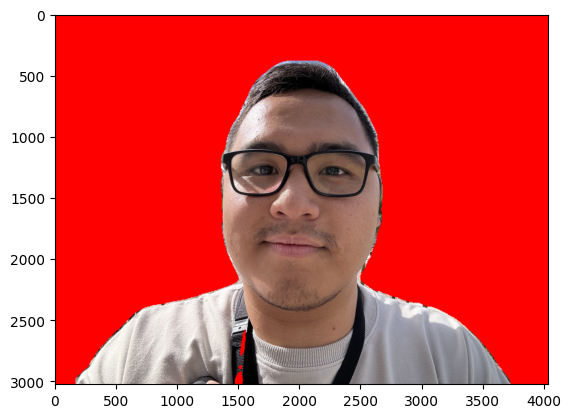

In [49]:
background_color = [255, 0, 0]

new_image = np.full(img_array.shape, background_color, dtype=np.uint8)

new_image[selfie_bin != 0] = img_array[selfie_bin != 0]

plt.imshow(new_image)

In [65]:
int(3024 * 0.031)

93

In [66]:
int(600 * 0.031)

18

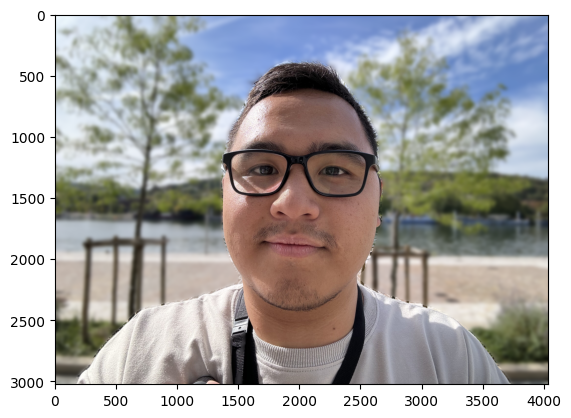

In [58]:
blurred_img = cv2.GaussianBlur(img_array, (93, 93), 0)

new_img2 = np.copy(blurred_img)
new_img2[selfie_bin != 0] = img_array[selfie_bin != 0]

plt.imshow(new_img2)